In [1]:
# Step 1: Install necessary libraries (if not already installed)
!pip install seaborn matplotlib pandas

# Step 2: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import numpy as np
df = pd.read_csv('Group1_cms_dataset.csv', encoding='Windows-1252')
numeric_df = df.select_dtypes(include=[np.number])
print("\n filtered dataframe with numeric columns")
print(numeric_df)



<ipython-input-2-21937ef11f09>:2: DtypeWarning: Columns (4,8,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Group1_cms_dataset.csv', encoding='Windows-1252')



 filtered dataframe with numeric columns
       YEAR  BENE_DSTNCT_CNT  TOT_EPSD_STAY_CNT  TOT_SRVC_DAYS  TOT_CHRG_AMT  \
0      2020          2849234            8416675       62728424   15836534186   
1      2020          1681571            1767370      126857339   35346615324   
2      2020           331414             374033        4794703   19161318557   
3      2020            73480              81204        2095772   18200487634   
4      2020          1423340            1935189       52224660   35860224122   
...     ...              ...                ...            ...           ...   
27953  2020               61                107           2931       1899334   
27954  2020               42                 50           1590       1165707   
27955  2020               85                119           3874       2724839   
27956  2020               23                 31            856        355927   
27957  2020               49                 69           3083       1850500  

In [3]:
numeric_df = numeric_df.drop(columns=['YEAR', 'HOSPC_RHC_DAYS_PCT'])

# Step 2: Display the DataFrame after dropping the column
print("\nDataFrame after dropping 'HOSPC_RHC_DAYS_PCT':")
print(numeric_df)


DataFrame after dropping 'HOSPC_RHC_DAYS_PCT':
       BENE_DSTNCT_CNT  TOT_EPSD_STAY_CNT  TOT_SRVC_DAYS  TOT_CHRG_AMT  \
0              2849234            8416675       62728424   15836534186   
1              1681571            1767370      126857339   35346615324   
2               331414             374033        4794703   19161318557   
3                73480              81204        2095772   18200487634   
4              1423340            1935189       52224660   35860224122   
...                ...                ...            ...           ...   
27953               61                107           2931       1899334   
27954               42                 50           1590       1165707   
27955               85                119           3874       2724839   
27956               23                 31            856        355927   
27957               49                 69           3083       1850500   

       TOT_ALOWD_AMT  TOT_MDCR_PYMT_AMT  TOT_MDCR_STDZD_PYMT_AM

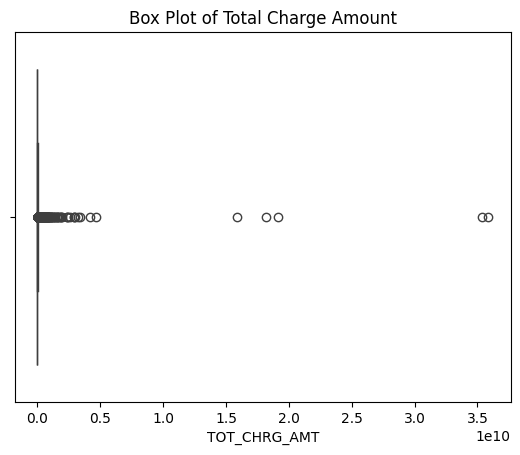

Filtered Providers DataFrame:
       BENE_DSTNCT_CNT  TOT_EPSD_STAY_CNT  TOT_SRVC_DAYS  TOT_CHRG_AMT  \
180                 71                 77           1913       4507805   
245                219                239           3267       2102688   
258                427               1027           7260       3299904   
259                141                371           2394        812346   
260                144                360           2355        542215   
...                ...                ...            ...           ...   
27953               61                107           2931       1899334   
27954               42                 50           1590       1165707   
27955               85                119           3874       2724839   
27956               23                 31            856        355927   
27957               49                 69           3083       1850500   

       TOT_ALOWD_AMT  TOT_MDCR_PYMT_AMT  TOT_MDCR_STDZD_PYMT_AMT  \
180          

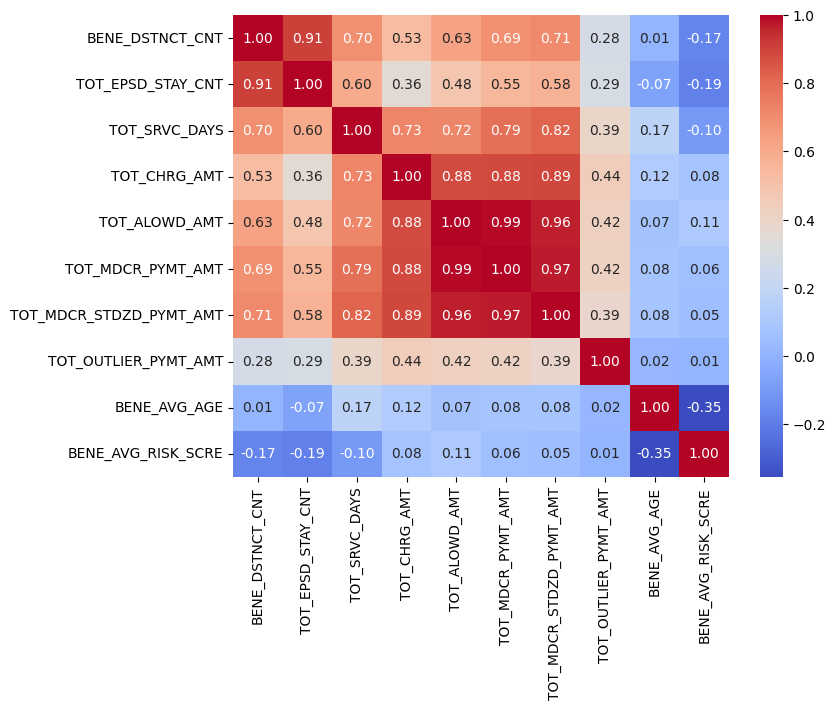

In [4]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
sns.boxplot(x=numeric_df['TOT_CHRG_AMT'])
plt.title('Box Plot of Total Charge Amount')
plt.show()

# Step 2: Identify outliers using IQR
Q1 = numeric_df['TOT_CHRG_AMT'].quantile(0.25)
Q3 = numeric_df['TOT_CHRG_AMT'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out outliers
filtered_providers_df = numeric_df[(numeric_df['TOT_CHRG_AMT'] >= lower_bound) &
                                     (numeric_df['TOT_CHRG_AMT'] <= upper_bound)]
print("Filtered Providers DataFrame:")
print(filtered_providers_df)
# Step 5: Create a heatmap for the filtered data
numeric_df1 = filtered_providers_df.select_dtypes(include=[np.number])
scaler = StandardScaler()
numeric_df1_scaled = pd.DataFrame(scaler.fit_transform(numeric_df1), columns=numeric_df1.columns)

# Calculate the correlation matrix
correlation_matrix = numeric_df1_scaled.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()